# SJ_FS_HP_5min_data_processing.ipynb

```
H Thompson
GRAPH
UQAM
Oct 2021
```

# Imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.style.use('seaborn-ticks')

# Files

In [42]:
yr = 2021
mnth = ["April","04"]
days = pd.Period(f'{yr}-{mnth[1]}-01').days_in_month
ind = pd.date_range(f'{int(yr)}-{int(mnth[1])}-01 00:00:00',f'{int(yr)}-{int(mnth[1])}-{days} 23:59:00',freq='5min')

In [43]:
path = f'../../../SAJESS_SERVER_DATA/FixedStation/hotplate/{yr}_{mnth[1]}/raw/'
hotplate_list = [filename for filename in os.listdir(path) if filename.startswith('Hotplate_data_5min')]

frames = [pd.read_csv(path+hotplate_file, index_col=0, header=None) for hotplate_file in hotplate_list]

cols = ['Precip_rate', 'Temp', 'Baro', 'RH', "Windspeed", 'Status', 'Sensor_power', 'Ref_power']

hp_df = pd.concat(frames)
hp_df.columns = cols
hp_df.index = pd.to_datetime(hp_df.index, infer_datetime_format=True)
hp_df.sort_index(inplace=True)
hp_df.index.rename('Timestamp', inplace=True)
hp_df.index = hp_df.index.floor('5min')

hp_df = hp_df[~hp_df.index.duplicated()]
reindxd = hp_df.reindex(index=ind)
reindxd.index[0],reindxd.index[-1],reindxd.shape

reindxd.index.name='Timestamp'

Text(0, 0.5, 'Temp')

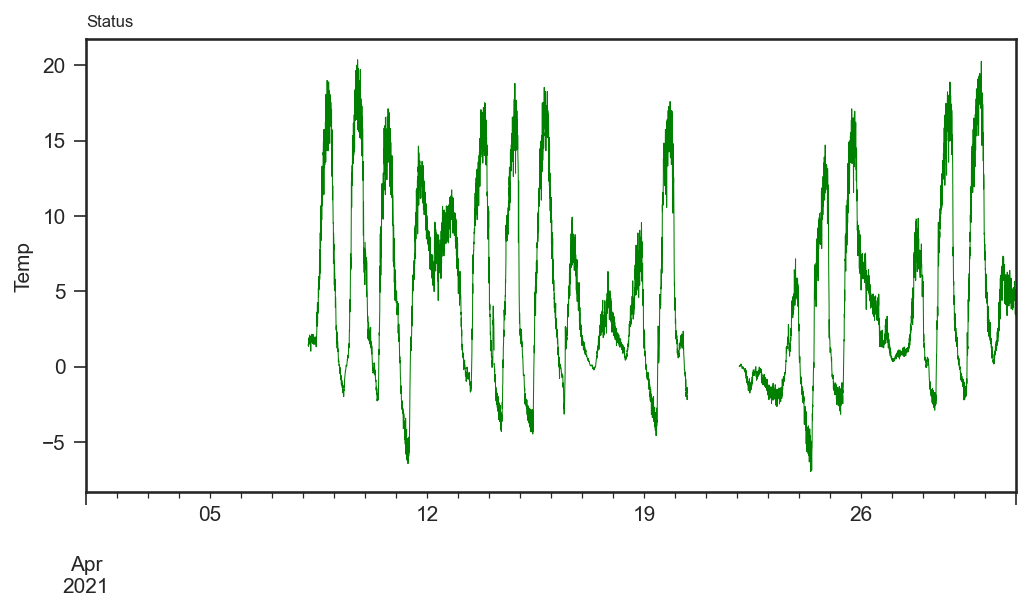

In [47]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)

#hp_df.Status.loc['2021-01-16':'2021-01-20'].plot(ax=ax, color='green', lw=.5)
reindxd.Temp.plot(ax=ax, color='green', lw=.5)
ax.set_title('Status', loc='left', fontsize=8)
ax.set_ylabel('Temp')

In [49]:
reindxd.to_csv(f'../../../SAJESS_SERVER_DATA/FixedStation/hotplate/{yr}_{mnth[1]}/master/SJ_FS_HP_MAS_5min_{yr}{mnth[1]}.txt')